In [1]:
MODEL_TYPES = ["Full", "New Features"]

MODEL_TYPE = MODEL_TYPES[1]

RUN_GRID_SEARCH_CV = True

IMPUTE_GREATER_THAN_THREE_STD_DEV = False

In [2]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
import plotly.express as px
%matplotlib inline

#### Load the CSV Data

In [3]:
df = pd.read_csv('../../../../data/cardio_train.csv', delimiter=';')


# Data Meaning Type


The cardiovascular dataset consists of 11 features and 1 target variable. Attribute descriptions can be found on [Kaggle](https://www.kaggle.com/sulianova/cardiovascular-disease-dataset). They are provided below.

There are 3 types of input features in the data set.
- **Objective**: factual information
- **Examination**:  results from a medical examination
- **Subjective**:  response provided by patient



**Table 1: Cardiovascular Dataset - Attribute Descriptions**

| Column Description | Feature Type | Column Name | Data Type |
|:---|:---|:---|:---|
| **Age**                        | Objective | age | int (days) |
| **Height**                     | Objective | height | int (cm) |
| **Weight**                     | Objective | weight | float (kg) |
| **Gender**                     | Objective | gender | 1: female, 2: male |
| **Systolic blood pressure**    | Examination | ap_hi | int |
| **Diastolic blood pressure**   | Examination | ap_lo | int |
| **Cholesterol**                | Examination | cholesterol | 1: normal, 2: above normal, 3: well above normal |
| **Glucose**                    | Examination | gluc | 1: normal, 2: above normal, 3: well above normal |
| **Smoking**                    | Subjective | smoke | binary |
| **Alcohol intake**             | Subjective | alco | binary |
| **Physical activity**          | Subjective | active | binary |
| **Has CVD?**                   | Target | cardio | binary |

In [4]:
df.set_index("id", inplace=True)

# Data Quality


In [5]:
df_clean = df.copy(deep=True)

In [6]:
df_clean.drop_duplicates(inplace=True)

## Transformations

In [7]:
# %%time
# df_clean['age'] = df_clean['age'].apply(lambda x: round(x / 365))
df_clean['age'] = (df_clean['age'] / 365).round().astype('int')

`Age` was provided in `days`, and for the sake of interpretability we'll be converting this to years for all observations.

In [8]:

df_clean['gender'] = np.where((df_clean.gender == 2), 1, 0)

In [9]:
df_clean.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,50,1,168,62.0,110,80,1,1,0,0,1,0
1,55,0,156,85.0,140,90,3,1,0,0,1,1
2,52,0,165,64.0,130,70,3,1,0,0,0,1
3,48,1,169,82.0,150,100,1,1,0,0,1,1
4,48,0,156,56.0,100,60,1,1,0,0,0,0


## Outliers

In [10]:
plt.style.use('ggplot')

In [11]:
df_clean.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000
mean,53.338945,0.349648,164.359152,74.208519,128.820453,96.636261,1.366997,1.226535,0.088159,0.053790,0.803718,0.499771
std,6.765633,0.476862,8.211218,14.397211,154.037729,188.504581,0.680333,0.572353,0.283528,0.225604,0.397187,0.500004
min,30.000000,0.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,0.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,1.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,65.000000,1.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


## Imputation

#### Age

In [12]:
median_age = df_clean['age'].median()

In [13]:
age_outlier_ids = df_clean.index[(np.abs(df_clean['age'] - df_clean['age'].mean()) > (3 * df_clean['age'].std()))]

In [14]:
if IMPUTE_GREATER_THAN_THREE_STD_DEV:
    df_clean.loc[df_clean.index.isin(age_outlier_ids), "age"] = np.nan

In [15]:
df_clean.loc[df_clean.index.isin(age_outlier_ids)].head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
8850,30,0,175,59.0,120,80,1,1,0,0,1,0
31922,30,1,175,92.0,100,60,1,1,0,0,1,0
43842,30,0,159,59.0,120,80,1,1,0,0,1,0
79749,30,0,160,59.0,110,70,1,1,0,0,1,0


#### Height

In [16]:
median_height = df_clean['height'].median()

In [17]:
height_outlier_ids = df_clean.index[(np.abs(df_clean['height'] - df_clean['height'].mean()) > (3 * df_clean['height'].std()))]


In [18]:
if IMPUTE_GREATER_THAN_THREE_STD_DEV:
    df_clean.loc[df_clean.index.isin(height_outlier_ids), "height"] = np.nan

In [19]:
df_clean.loc[df_clean.index.isin(height_outlier_ids)].shape[0]

293

#### Weight

In [20]:
median_weight = df_clean['weight'].median()

In [21]:
weight_outlier_ids = df_clean.index[(np.abs(df_clean['weight'] - df_clean['weight'].mean()) > (3 * df_clean['weight'].std()))]


In [22]:
if IMPUTE_GREATER_THAN_THREE_STD_DEV:
    df_clean.loc[df_clean.index.isin(weight_outlier_ids), "weight"] = np.nan


In [23]:
df_clean.loc[df_clean.index.isin(weight_outlier_ids)].shape[0]

702

#### Systolic blood pressure (ap_hi)

In [24]:
median_ap_hi = df_clean['ap_hi'].median()

In [25]:
ap_hi_outlier_ids = df_clean.index[(np.abs(df_clean['ap_hi'] - df_clean['ap_hi'].mean()) > (3 * df_clean['ap_hi'].std()))]


In [26]:
if IMPUTE_GREATER_THAN_THREE_STD_DEV:
    df_clean.loc[df_clean.index.isin(ap_hi_outlier_ids), "ap_hi"] = np.nan

In [27]:
df_clean.loc[df_clean.index.isin(ap_hi_outlier_ids)].shape[0]

38

In [28]:
ap_hi_outlier_ids2 = df_clean.index[(df_clean['ap_hi'] < 40) | (df_clean['ap_hi'] > 300)]


In [29]:
if IMPUTE_GREATER_THAN_THREE_STD_DEV:
    df_clean.loc[df_clean.index.isin(ap_hi_outlier_ids2), "ap_hi"] = np.nan

#### Diastolic blood pressure (ap_lo)

In [30]:
median_ap_lo = df_clean['ap_lo'].median()

In [31]:
ap_lo_outlier_ids = df_clean.index[(np.abs(df_clean['ap_lo'] - df_clean['ap_lo'].mean()) > (3 * df_clean['ap_lo'].std()))]

In [32]:
if IMPUTE_GREATER_THAN_THREE_STD_DEV:
    df_clean.loc[df_clean.index.isin(ap_lo_outlier_ids), "ap_lo"] = np.nan

In [33]:
df_clean.loc[df_clean.index.isin(ap_lo_outlier_ids)].shape[0]

951

In [34]:
ap_lo_outlier_ids2 = df_clean.index[(df_clean['ap_lo'] < 40) | (df_clean['ap_lo'] > 300)]

In [35]:
if IMPUTE_GREATER_THAN_THREE_STD_DEV:
    df_clean.loc[df_clean.index.isin(ap_lo_outlier_ids2), "ap_lo"] = np.nan

The `ap_lo` feature needed similar processing.

### Transformations

In [36]:
df_clean['bmi'] = df_clean['weight'] / (df_clean['height']/100)**2

In [37]:
df_clean['bmiGrp'] = np.where((df_clean.bmi < 18.5), 1, 0)
df_clean['bmiGrp'] = np.where((df_clean.bmi >= 18.5) & (df_clean.bmi < 25), 2, df_clean.bmiGrp)
df_clean['bmiGrp'] = np.where((df_clean.bmi >= 25) & (df_clean.bmi < 30), 3, df_clean.bmiGrp)
df_clean['bmiGrp'] = np.where((df_clean.bmi >= 30), 4, df_clean.bmiGrp)

In [38]:
df_clean['bp'] = np.where((df_clean.ap_hi < 120) & (df_clean.ap_lo < 80), 1, 0)
df_clean['bp'] = np.where((df_clean.ap_hi >= 120) & (df_clean.ap_hi < 130) & (df_clean.ap_lo < 80), 2, df_clean.bp)
df_clean['bp'] = np.where((df_clean.ap_hi >= 130) & (df_clean.ap_hi < 140) | ((df_clean.ap_lo >= 80) & (df_clean.ap_lo < 90)), 3, df_clean.bp)
df_clean['bp'] = np.where((df_clean.ap_hi >= 140) | (df_clean.ap_lo >= 90), 4, df_clean.bp)
df_clean['bp'] = np.where((df_clean.ap_hi > 180) | (df_clean.ap_lo > 120), 5, df_clean.bp)

In [39]:
df_clean.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmiGrp,bp
count,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000
mean,53.338945,0.349648,164.359152,74.208519,128.820453,96.636261,1.366997,1.226535,0.088159,0.053790,0.803718,0.499771,27.557610,2.877129,3.053075
std,6.765633,0.476862,8.211218,14.397211,154.037729,188.504581,0.680333,0.572353,0.283528,0.225604,0.397187,0.500004,6.092210,0.808932,1.000928
min,30.000000,0.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.471784,1.000000,1.000000
25%,48.000000,0.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115,2.000000,3.000000
50%,54.000000,0.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.391837,3.000000,3.000000
75%,58.000000,1.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.222222,4.000000,4.000000
max,65.000000,1.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,298.666667,4.000000,5.000000


# Create Models (50 points)

Create a logistic regression model and a support vector machine model for the classification task involved with your dataset. Assess how well each model performs (use 80/20 training/testing split for your data). Adjust parameters of the models to make them more accurate. If your dataset size requires the use of stochastic gradient descent, then linear kernel only is fine to use. That is, the SGDClassifier is fine to use for optimizing logistic regression and linear support vector machines. For many problems, SGD will be required in order to train the SVM model in a reasonable timeframe. 



# Model Advantages (10)

Does one type of model offer superior performance over another in terms of prediction accuracy? In terms of training time or efficiency? Explain in detail.


# Interpret Feature Importance (30)

Use the weights from logistic regression to interpret the importance of different features for the classification task. Explain your interpretation in detail. Why do you think some variables are more important?

# Interpret Support Vectors (10)

Look at the chosen support vectors for the classification task. Do these provide any insight into the data? Explain. If you used stochastic gradient descent (and therefore did not explicitly solve for support vectors), try subsampling your data to train the SVC model— then analyze the support vectors from the subsampled dataset.

Store feature matrix 

In [40]:
if MODEL_TYPE == "Full":
    # Full Model
    X_cols = ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
else:
    # New Feature Model
    X_cols = ['age', 'gender', 'bmiGrp', 'bp', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']

X = df_clean[X_cols] #.to_numpy()


Store response vector

In [41]:
y = df_clean['cardio'] #.to_numpy()


## Logistic Regression

Full Model consisting of all features with standardized values.


In [42]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder



In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=1)

rs = RobustScaler()
X_train_std = rs.fit_transform(X_train)
X_test_std = rs.transform(X_test)

# sc = StandardScaler()
# X_train_std = sc.fit_transform(X_train)
# X_test_std = sc.transform(X_test)

# si = SimpleImputer(strategy="median")
# X_train_std = si.fit_transform(X_train_std)
# X_test_std = si.transform(X_test_std)

logreg = LogisticRegression(n_jobs=-1, random_state=1)
logreg.fit(X_train_std, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [44]:
# sort these attributes and spit them out
zip_vars = zip(logreg.coef_.T, X.columns) # combine attributes
zip_vars = sorted(zip_vars)
for coef, name in zip_vars:
    print(name, 'has weight of', round(coef[0], 3)) # now print them out

active has weight of -0.201
alco has weight of -0.2
smoke has weight of -0.109
gluc has weight of -0.091
gender has weight of 0.031
bmiGrp has weight of 0.468
cholesterol has weight of 0.535
age has weight of 0.539
bp has weight of 0.79


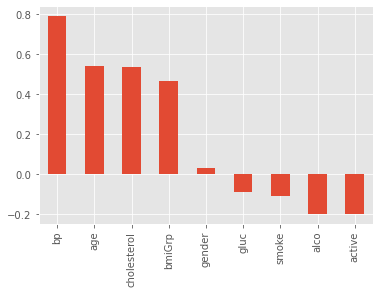

In [45]:
# now let's make a pandas Series with the names and values, and plot them

from collections import OrderedDict

plt.style.use('ggplot')

coef_dict = {}

for coef, feat in zip(logreg.coef_[0,:], X.columns):
    coef_dict[feat] = coef

coef_dict = OrderedDict({k: v for k, v in sorted(coef_dict.items(), key=lambda item: item[1])})
  
# weights = pd.Series(logreg.coef_[0],index=X.columns)
weights = pd.Series(coef_dict).sort_values(ascending=False)
weights.plot(kind='bar')
plt.show()


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=1)

X_train = pd.get_dummies(X_train, columns=['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active'])
X_test = pd.get_dummies(X_test, columns=['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active'])

rs = RobustScaler()
X_train_std = rs.fit_transform(X_train)
X_test_std = rs.transform(X_test)

# use get dummies instead
# ohe = OneHotEncoder()
# X_train_std = ohe.fit_transform(X_train_std)
# X_test_std = ohe.transform(X_test_std)

logreg = LogisticRegression(n_jobs=-1, random_state=1)
logreg.fit(X_train_std, y_train)




LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

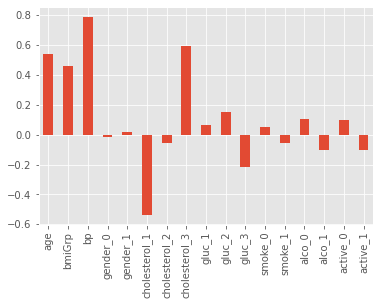

In [47]:
# print (ohe.categories_)

ohe_columns = ['age', 'bmiGrp', 'bp', 'gender_0', 'gender_1',  'cholesterol_1', 'cholesterol_2', 'cholesterol_3', 
               'gluc_1', 'gluc_2', 'gluc_3', 'smoke_0', 'smoke_1', 'alco_0', 'alco_1', 'active_0', 'active_1']


weights = pd.Series(logreg.coef_[0], ohe_columns)
weights.plot(kind='bar')
plt.show()


In [48]:
y_pred = logreg.predict(X_test_std)

In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

precision    recall  f1-score   support

           0       0.71      0.70      0.70      7001
           1       0.70      0.72      0.71      6995

    accuracy                           0.71     13996
   macro avg       0.71      0.71      0.71     13996
weighted avg       0.71      0.71      0.71     13996



In [50]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, X_train_std, y_train,
                         scoring="accuracy", cv=3)

def display_scores(scores):
    print("Scores:", scores.round(3))
    print("Mean:", scores.mean().round(3))
    print("Standard deviation:", scores.std().round(3))

display_scores(scores)

Scores: [0.714 0.708 0.715]
Mean: 0.712
Standard deviation: 0.003


In [51]:
if MODEL_TYPE == "Full":
    # Full Model
    num_attribs = ["age", "height", "weight", "ap_hi", "ap_lo"]
    cat_attribs = ["gender", "cholesterol", "gluc", "smoke", "alco", "active"]
else:
    # With New Features
    num_attribs = ["age", "bmiGrp", "bp"]
    cat_attribs = ["gender", "cholesterol", "gluc", "smoke", "alco", "active"]



In [52]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report


num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('rbs_scaler', RobustScaler()),
        # ('std_scaler', StandardScaler()),
    ])


In [53]:
from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(drop="first"), cat_attribs),
    ])

X_prepared = full_pipeline.fit_transform(X)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_prepared, y, stratify=y, test_size=0.2, random_state=1)


In [55]:
logreg = LogisticRegression(n_jobs=-1, C=2, random_state=1)
logreg.fit(X_train, y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [56]:
y_pred = logreg.predict(X_test)


In [57]:
print(classification_report(y_test, y_pred))

precision    recall  f1-score   support

           0       0.71      0.70      0.70      7001
           1       0.70      0.72      0.71      6995

    accuracy                           0.71     13996
   macro avg       0.71      0.71      0.71     13996
weighted avg       0.71      0.71      0.71     13996



In [58]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[4876 2125]
 [1969 5026]]


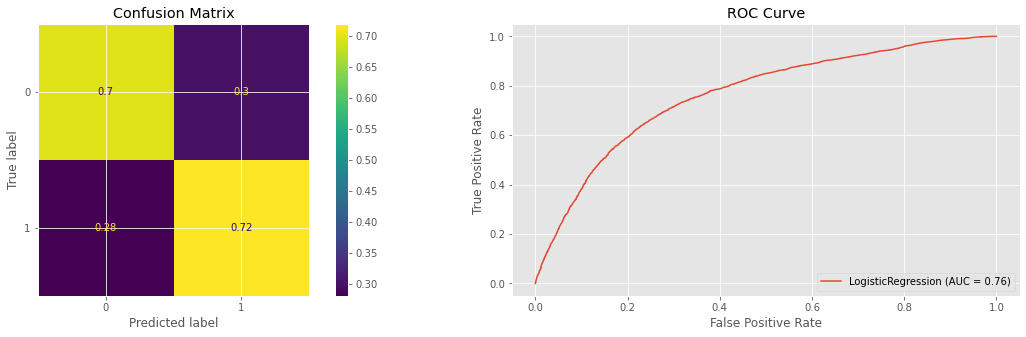

In [59]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve

fig = plt.figure(1, figsize=(20, 5))

chart_1 = fig.add_subplot(121)
chart_2 = fig.add_subplot(122)

plot_confusion_matrix(logreg, X_test, y_test, normalize='true', ax=chart_1)
chart_1.set_title('Confusion Matrix')

plot_roc_curve(logreg, X_test, y_test, ax=chart_2)
chart_2.set_title('ROC Curve')

plt.show()

In [60]:

print('Accuracy of the log reg model on the test data: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of the log reg model on the test data: 0.71


In [61]:
from IPython.display import Markdown as md

In [62]:
### Logistic Regression Metrics

md(f"**True Positives:**  {confusion_matrix[1, 1]} \n\n **True Negatives:**  {confusion_matrix[0, 0]} \n\n **False Positives:**  {confusion_matrix[0, 1]} \n\n **False Negatives:**  {confusion_matrix[1, 0]}")


**True Positives:**  5026 

 **True Negatives:**  4876 

 **False Positives:**  2125 

 **False Negatives:**  1969

In [63]:
md(f"**Accuracy:**  { format(( confusion_matrix[1, 1] + confusion_matrix[0, 0] ) / confusion_matrix.sum(), '.3f')}\n\n-how often we were correct overall")

**Accuracy:**  0.707

-how often we were correct overall

In [64]:
md(f"**Error:**  { format(( confusion_matrix[0, 1] + confusion_matrix[1, 0] ) / confusion_matrix.sum(), '.3f')}\n\n-how often we were incorrect overall")

**Error:**  0.293

-how often we were incorrect overall

In [65]:
md(f"**Sensitivity/ Recall:**  { format(( confusion_matrix[1, 1] ) / confusion_matrix[1].sum(axis=0), '.3f')}\n\n-when the patient actually had CVD, how often were we correct")

**Sensitivity/ Recall:**  0.719

-when the patient actually had CVD, how often were we correct

In [66]:
md(f"**Specificity:**  { format(( confusion_matrix[0, 0] ) / confusion_matrix[0].sum(), '.3f')}\n\n-when the patient did not had CVD, how often were we correct")

**Specificity:**  0.696

-when the patient did not had CVD, how often were we correct

In [67]:
md(f"**False Postive Rate:**  { format(( confusion_matrix[0, 1] ) / ( confusion_matrix[0, 0] + confusion_matrix[0, 1] ), '.3f')}\n\n-when the patient did not had CVD, how often were we incorrect")

**False Postive Rate:**  0.304

-when the patient did not had CVD, how often were we incorrect

In [68]:
md(f"**Precision:**  { format(( confusion_matrix[1, 1] ) / ( confusion_matrix[1, 1] + confusion_matrix[0, 1] ), '.3f')}\n\n-how precise were we when classifying the patient as having CVD")

**Precision:**  0.703

-how precise were we when classifying the patient as having CVD

In [70]:
# SGDClassifier()
# LogisticRegression()
# LinearSVC()

from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

model_params = {
    "sgd": {
        "model": SGDClassifier(),
        "params": {
            "alpha": [0.00001, 0.0001, 0.001, 0.01, 0.1],
            "class_weight": ["balanced", None]
        }
    },
    "logistic_regression": {
        "model": LogisticRegression(),
        "params": {
            "C": [1, 2, 5, 10, 15, 20]
        }
    },
    "linear_svc": {
        "model": LinearSVC(),
        "params": {
            "C": [1, 2, 5, 10, 15, 20], 
            "class_weight": ["balanced", None]
        }
    }
}

# SVC rfb
# paramaters = [{"C": [1, 10, 100, 1000], "kernel": ["rbf"], "gamma": [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]

In [71]:
if (RUN_GRID_SEARCH_CV):

    from sklearn.model_selection import GridSearchCV

    scores = []

    for model_name, mp in model_params.items():
        clf = GridSearchCV(estimator = mp["model"], param_grid=mp["params"], cv=10, scoring="roc_auc", n_jobs=-1)
        clf.fit(X_train, y_train)
        scores.append({"model": model_name,
        "best_score": clf.best_score_, # Mean cross-validated score of the best_estimator
        "best_params": clf.best_params_
        })

    df_grid_search_scores = pd.DataFrame(scores, columns=["model", "best_score", "best_params"])
    print(df_grid_search_scores)


model  best_score  \
0                  sgd    0.769209   
1  logistic_regression    0.769696   
2           linear_svc    0.769159   

                                    best_params  
0  {'alpha': 0.001, 'class_weight': 'balanced'}  
1                                      {'C': 2}  
2               {'C': 15, 'class_weight': None}  


In [90]:
# if RUN_GRID_SEARCH_CV:
df_grid_search_scores

,model,best_score,best_params
0,sgd,0.769209,"{'alpha': 0.001, 'class_weight': 'balanced'}"
1,logistic_regression,0.769696,{'C': 2}
2,linear_svc,0.769159,"{'C': 15, 'class_weight': None}"


# SGDClassifier

In [73]:

svm_sgd = SGDClassifier(alpha=0.001, class_weight="balanced", n_jobs=-1, random_state=1) # get object

In [74]:
svm_sgd.fit(X_train, y_train)  # train object

SGDClassifier(alpha=0.001, average=False, class_weight='balanced',
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=1, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [75]:
y_pred = svm_sgd.predict(X_test)

In [76]:
print(classification_report(y_test, y_pred))

precision    recall  f1-score   support

           0       0.71      0.70      0.70      7001
           1       0.70      0.71      0.71      6995

    accuracy                           0.71     13996
   macro avg       0.71      0.71      0.71     13996
weighted avg       0.71      0.71      0.71     13996



# LinearSVC

In [77]:

svm_lin = LinearSVC(C=15, class_weight=None) # get object
svm_lin.fit(X_train, y_train)  # train object


LinearSVC(C=5, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [78]:
y_pred = svm_lin.predict(X_test)

In [79]:
print(classification_report(y_test, y_pred))

precision    recall  f1-score   support

           0       0.72      0.69      0.70      7001
           1       0.70      0.73      0.71      6995

    accuracy                           0.71     13996
   macro avg       0.71      0.71      0.71     13996
weighted avg       0.71      0.71      0.71     13996



# SVC

In [80]:

svm_best = SVC(kernel='rbf', C=1, gamma=0.1, class_weight="balanced", random_state=1) # get object
svm_best = SVC() # get object


In [81]:
svm_best.fit(X_train, y_train)  # train object

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [82]:
y_pred = svm_best.predict(X_test)

In [83]:
print(classification_report(y_test, y_pred))

precision    recall  f1-score   support

           0       0.70      0.79      0.74      7001
           1       0.76      0.66      0.71      6995

    accuracy                           0.72     13996
   macro avg       0.73      0.72      0.72     13996
weighted avg       0.73      0.72      0.72     13996



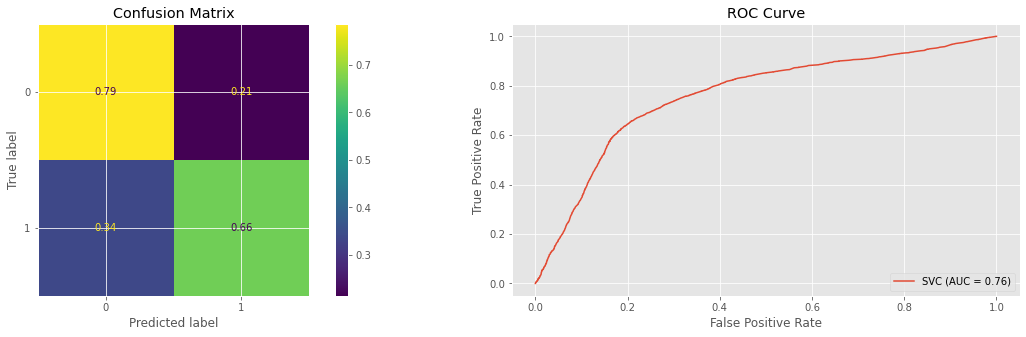

In [84]:
fig = plt.figure(1, figsize=(20, 5))

chart_1 = fig.add_subplot(121)
chart_2 = fig.add_subplot(122)

plot_confusion_matrix(svm_best, X_test, y_test, normalize='true', ax=chart_1)
chart_1.set_title('Confusion Matrix')

plot_roc_curve(svm_best, X_test, y_test, ax=chart_2)
chart_2.set_title('ROC Curve')

plt.show()